## Feature Correlation

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


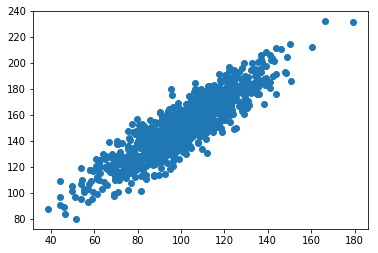

In [2]:
import numpy as np

from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
seed(1)


# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [5]:
covariance = np.cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


### Pearson's Correllation

P = covariance / (std(x)*std(y))

In [6]:
from scipy.stats import pearsonr


corr, _ = pearsonr(data1, data2)

print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


### Spearman's Correlation
Nonlinear relationship (nonparametric) rank based correlation

S = covariance(rank(x), rank(Y)) / std(rank(X))*std(rank(Y))

In [7]:
from scipy.stats import spearmanr

corr, _ = spearmanr(data1, data2)

print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.872


## Outlier Detection

### Standard Deviation Method

In [11]:
import numpy as np
# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

mean=151.050 stdv=22.358


In [13]:
# calculate summary statistics
data_mean, data_std = np.mean(data2), np.std(data2)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [18]:
# identify outliers
outliers = [x for x in data2 if x < lower or x > upper]
len(outliers)

3

In [17]:
# remove outliers
outliers_removed = [x for x in data2 if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 997


### IQ Range Method

In [19]:
import numpy as np
# calculate interquartile range
q25, q75 = np.percentile(data2, 25), np.percentile(data2, 75)
iqr = q75 - q25

In [20]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [22]:
# identify outliers
outliers = [x for x in data2 if x < lower or x > upper]
len(outliers)

12